In [390]:
import pandas as pd
import numpy as np

##  Breast Cancer data set configirations: 

In [391]:
df = pd.read_csv('dataR2.csv')   # loading the data set in to the pandas dataframe.
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [392]:
print("dataSet shape: ", df.shape)
print("dataset class labels: ", df['Classification'].unique())

dataSet shape:  (116, 10)
dataset class labels:  [1 2]


## Logistic Regression on Cancer data set:

In [393]:
# df = df.sample(frac = 1)    # suffeling the rows.
# df
df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
print("after suffeling the data set:\n")
df.head(10)

after suffeling the data set:



,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,75,27.300000,85,5.197,1.089638,10.3900,9.000805,7.57670,335.393,1
1,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227,1
2,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2
3,24,18.670000,88,6.107,1.330000,8.8800,36.060000,6.85000,632.220,1
4,82,31.217482,100,18.077,4.458993,31.6453,9.923650,19.94687,994.316,2
5,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602,1
6,66,26.562500,89,6.524,1.432235,14.9084,8.429960,14.91922,269.487,2
7,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020,1
8,46,20.830000,88,3.420,0.742368,12.8700,18.550000,13.56000,301.210,2
9,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1


In [394]:
from sklearn import preprocessing

y = df['Classification']    # y is vector contaning the class labels.

# extracting features of the problem(Matrix of features). (deleting the class label values)
X = df.drop('Classification', axis = 1)  
# replacing class label values.
y = y.replace({1:0, 2:1})    # -> 1 => cancer , 0 => healthy

In [395]:
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,0.784615,0.441888,0.177305,0.049350,0.025311,0.070712,0.201869,0.055352,0.175209
1,0.800000,0.436939,0.241135,0.207718,0.113695,0.367342,0.211374,0.065986,0.200523
2,0.692308,0.155569,0.368794,0.075873,0.056091,0.328828,0.068217,0.158306,0.403847
3,0.000000,0.014845,0.198582,0.065592,0.035089,0.053147,0.945580,0.046140,0.354822
4,0.892308,0.635738,0.283688,0.279235,0.162372,0.317955,0.227233,0.212155,0.573929
5,0.646154,0.636783,0.156028,0.031217,0.015387,0.138581,0.071765,0.001036,0.356263
6,0.646154,0.405394,0.205674,0.073035,0.039248,0.123270,0.186179,0.148425,0.135329
7,0.215385,0.245933,0.106383,0.059792,0.024499,0.127360,0.447834,0.077830,0.072115
8,0.338462,0.121729,0.198582,0.017634,0.011185,0.099559,0.464325,0.131195,0.154525
9,0.353846,0.181110,0.170213,0.007800,0.004987,0.259849,1.000000,0.001394,0.088271


In [396]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

#y_test_bin = y_test.replace({1 : 0, 2 : 1}, inplace = False).to_numpy()   # -> 1 => cancer , 0 => healthy
# y_test_MinusPlusOne = y_test.replace({1 : -1, 2 : 1}, inplace = False).to_numpy()  # -> 1 => cancer , -1 => healthy
#y_train_bin = y_train.replace({1 : 0, 2 : 1}, inplace = False).to_numpy()
# y_train_MinusPlusOne = y_train.replace({1 : -1, 2 : 1}, inplace = False).to_numpy() 

y_train_bin = y_train.to_numpy()
y_test_bin = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print(X_train[:10, :])     # printing 10 first records of train features matrix.


[[0.33846154 0.73285056 0.22695035 0.05922039 0.03406664 0.16725797
  0.20624407 0.07199899 0.09884261]
 [0.46153846 0.28941659 0.18439716 0.02316699 0.01317372 0.05090672
  0.05632177 0.09043668 0.35653338]
 [0.21538462 0.20434888 0.24822695 0.05049261 0.03113619 0.04800568
  0.08563934 0.15877881 0.09270984]
 [0.8        0.43693926 0.24113475 0.20771757 0.11369495 0.36734172
  0.21137352 0.06598555 0.20052318]
 [0.58461538 0.4191252  0.28368794 0.03744556 0.02644076 0.09467366
  0.54320555 0.05209786 0.17204255]
 [0.30769231 0.31520986 0.32624113 1.         0.60277317 0.16109295
  0.39698736 0.02661934 0.12036026]
 [0.38461538 0.14832783 0.12765957 0.00371243 0.0016486  0.02353057
  0.06129415 0.25012727 0.4186314 ]
 [0.89230769 0.6357383  0.28368794 0.27923538 0.16237219 0.31795531
  0.2272327  0.21215452 0.57392879]
 [0.93846154 0.46112571 0.96453901 0.88138074 1.         0.77436518
  0.17165975 0.65921283 0.6247839 ]
 [0.8        0.43199091 0.35460993 0.42441279 0.27028952 0.20317

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(X_train, y_train_bin)

LogisticRegression()

In [398]:
logistic_train_score = logisticRegression_model.score(X_train, y_train_bin)
print('logistic train score: ', logistic_train_score)

logistic train score:  0.7681159420289855


In [399]:
y_pred = logisticRegression_model.predict(X_test)    # predict using test data.
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [400]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for logistic regression : \n", report)

Confusion Matrix for test : 
 [[11 12]
 [ 5 19]]

classification for logistic regression : 
               precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.61      0.79      0.69        24

    accuracy                           0.64        47
   macro avg       0.65      0.63      0.63        47
weighted avg       0.65      0.64      0.63        47



In [401]:
logistic_test_score = logisticRegression_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('logistic test score: ', logistic_test_score)

logistic test score:  0.6382978723404256


## SVM with linear kernel on Cancer data:

In [402]:
from sklearn import svm

SVM_linearKernel_model = svm.SVC(kernel='linear')
SVM_linearKernel_model.fit(X_train, y_train_bin)

SVM_linearKernel_train_score = SVM_linearKernel_model.score(X_train, y_train_bin)
print('SVM(linear kernel) train score: ', SVM_linearKernel_train_score)

SVM(linear kernel) train score:  0.7391304347826086


In [403]:
#Predict the response for test dataset
y_pred = SVM_linearKernel_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [404]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for SVM(linear kernel) : \n", report)

Confusion Matrix for test : 
 [[13 10]
 [ 8 16]]

classification for SVM(linear kernel) : 
               precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.62      0.67      0.64        24

    accuracy                           0.62        47
   macro avg       0.62      0.62      0.62        47
weighted avg       0.62      0.62      0.62        47



In [405]:
SVM_linearKernel_test_score = SVM_linearKernel_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('SVM(linear kernel) test score: ', SVM_linearKernel_test_score)

SVM(linear kernel) test score:  0.6170212765957447


## SVM with RBF kernel on Cancer data:

In [406]:
SVM_RBFKernel_model = svm.SVC(kernel='rbf')
SVM_RBFKernel_model.fit(X_train, y_train_bin)

SVM_RBFKernel_train_score = SVM_RBFKernel_model.score(X_train, y_train_bin)
print('SVM(RBF kernel) train score: ', SVM_RBFKernel_train_score)

SVM(RBF kernel) train score:  0.8840579710144928


In [407]:
y_pred = SVM_RBFKernel_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [408]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for SVM(RBF kernel) : \n", report)

Confusion Matrix for test : 
 [[18  5]
 [ 8 16]]

classification for SVM(RBF kernel) : 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.76      0.67      0.71        24

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47



In [409]:
SVM_RBFKernel_test_score = SVM_RBFKernel_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('SVM(RBF kernel) test score: ', SVM_RBFKernel_test_score)

SVM(RBF kernel) test score:  0.723404255319149


## Decision Tree on Cancer data:

In [410]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
DecisionTree_model = DecisionTree_model.fit(X_train, y_train_bin)

DecisionTree_model_train_score = DecisionTree_model.score(X_train, y_train_bin)
print('DecisionTree train score: ', DecisionTree_model_train_score)


DecisionTree train score:  1.0


In [411]:
#Predict the response for test dataset
y_pred = DecisionTree_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [412]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print("Confusion Matrix for test : \n", cm)
print("\nclassification for DecisionTree : \n", report)

Confusion Matrix for test : 
 [[14  9]
 [12 12]]

classification for DecisionTree : 
               precision    recall  f1-score   support

           0       0.54      0.61      0.57        23
           1       0.57      0.50      0.53        24

    accuracy                           0.55        47
   macro avg       0.55      0.55      0.55        47
weighted avg       0.56      0.55      0.55        47



In [413]:
DecisionTree_test_score = DecisionTree_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('DecisionTree test score: ', DecisionTree_test_score)

DecisionTree test score:  0.5531914893617021


## Visualizing Decision Tree:

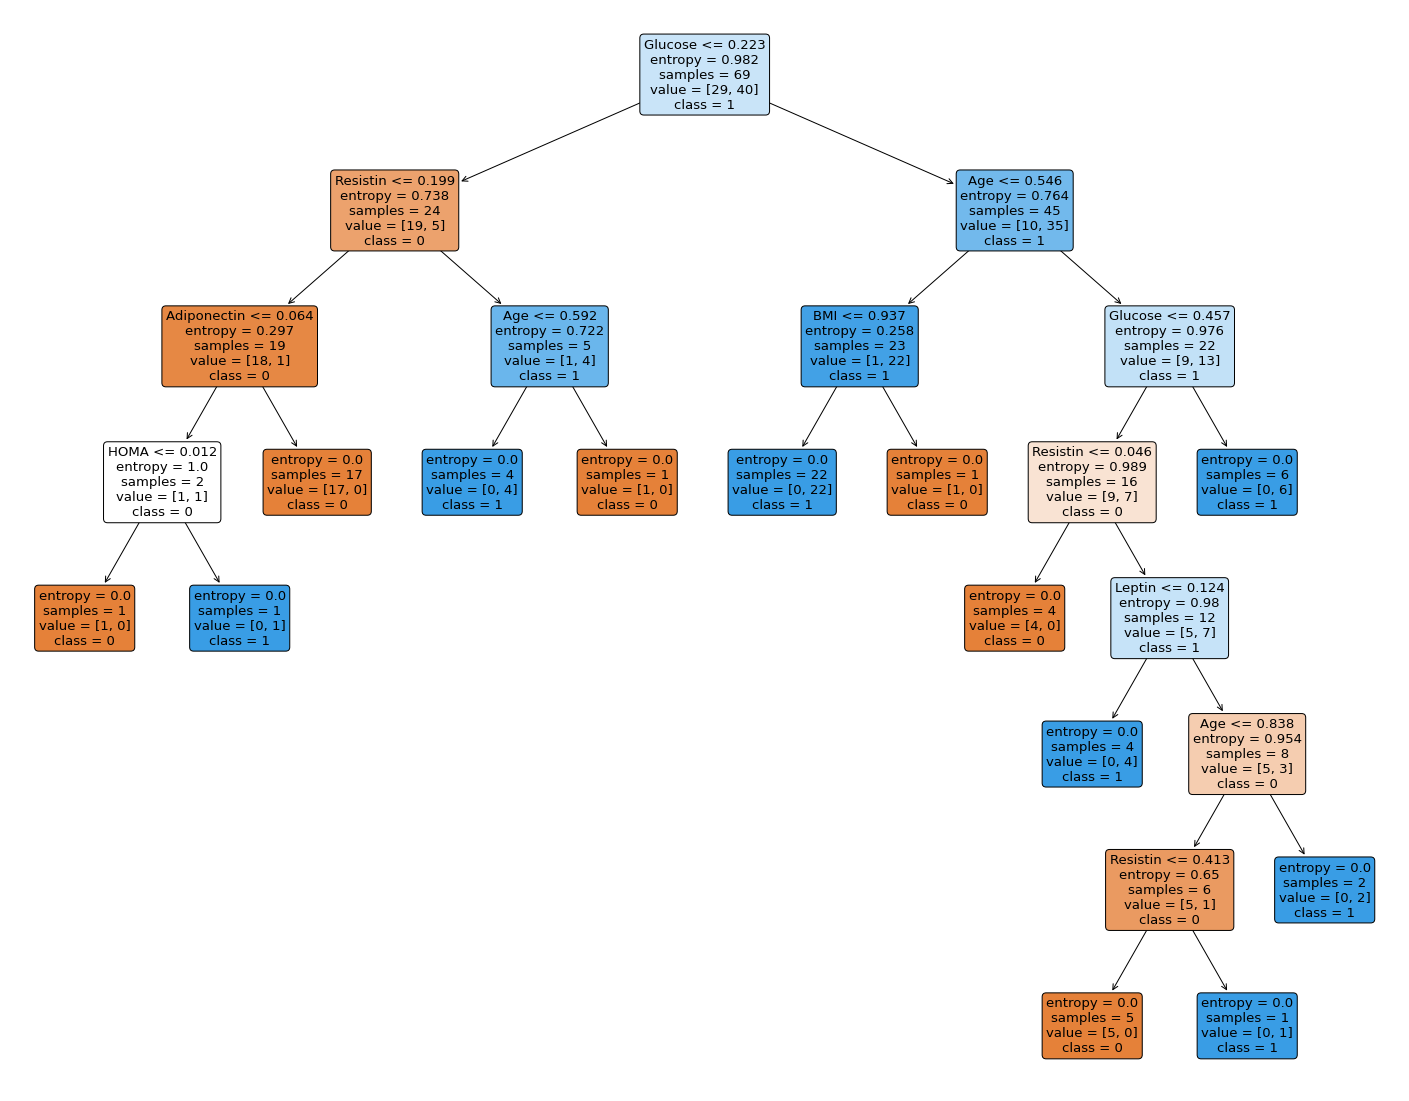

In [414]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree_model, 
                   feature_names=names,  
                   class_names=['0', '1'],
                   filled=True, rounded=True)

## KNN on Cancer data:

In [415]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
test_scores_k = {}
train_scores_k = {}

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train_bin)
    train_scores_k[k] = knn_model.score(X_train, y_train_bin)
    y_pred = knn_model.predict(X_test)
    test_scores_k[k] = knn_model.score(X_test, y_test_bin)
    
print("result in train data according to k : \n")
train_scores_k


result in train data according to k : 



{1: 1.0,
 2: 0.8260869565217391,
 3: 0.855072463768116,
 4: 0.8115942028985508,
 5: 0.8405797101449275,
 6: 0.8405797101449275,
 7: 0.7971014492753623,
 8: 0.782608695652174,
 9: 0.7971014492753623,
 10: 0.782608695652174,
 11: 0.782608695652174,
 12: 0.7971014492753623,
 13: 0.7536231884057971,
 14: 0.7391304347826086,
 15: 0.7391304347826086,
 16: 0.7536231884057971,
 17: 0.7681159420289855,
 18: 0.7681159420289855,
 19: 0.7681159420289855,
 20: 0.7391304347826086,
 21: 0.7681159420289855,
 22: 0.7681159420289855,
 23: 0.7971014492753623,
 24: 0.782608695652174,
 25: 0.7536231884057971,
 26: 0.7681159420289855,
 27: 0.7246376811594203,
 28: 0.7101449275362319,
 29: 0.7246376811594203,
 30: 0.7536231884057971}

In [416]:
print("result in test data according to k : \n")
test_scores_k

result in test data according to k : 



{1: 0.574468085106383,
 2: 0.5957446808510638,
 3: 0.723404255319149,
 4: 0.7021276595744681,
 5: 0.723404255319149,
 6: 0.7021276595744681,
 7: 0.6170212765957447,
 8: 0.6382978723404256,
 9: 0.6170212765957447,
 10: 0.6595744680851063,
 11: 0.6382978723404256,
 12: 0.5957446808510638,
 13: 0.6382978723404256,
 14: 0.574468085106383,
 15: 0.574468085106383,
 16: 0.5957446808510638,
 17: 0.574468085106383,
 18: 0.5531914893617021,
 19: 0.5319148936170213,
 20: 0.5531914893617021,
 21: 0.5957446808510638,
 22: 0.5957446808510638,
 23: 0.6170212765957447,
 24: 0.7021276595744681,
 25: 0.5957446808510638,
 26: 0.6808510638297872,
 27: 0.5957446808510638,
 28: 0.5957446808510638,
 29: 0.574468085106383,
 30: 0.6170212765957447}

[Text(0.5, 0, 'k values'), Text(0, 0.5, 'train scores')]

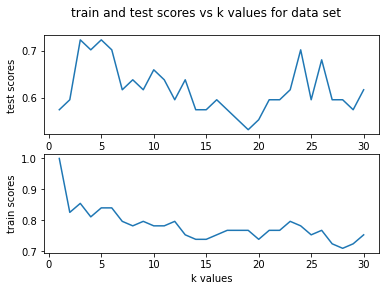

In [417]:

k_vals = list(k_range)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('train and test scores vs k values for data set')

ax1.plot(k_vals, test_scores_k.values())

ax1.set(xlabel='k values', ylabel='test scores')

ax2.plot(k_vals, train_scores_k.values())
ax2.set(xlabel='k values', ylabel='train scores')

In [418]:
sorted_testScores = {k: v for k, v in sorted(test_scores_k.items(), key=lambda item: item[1])}

best_k = list(sorted_testScores.keys())[len(sorted_testScores) - 1]

print('best k for knn is : ', best_k)
knn_model = KNeighborsClassifier(n_neighbors = best_k)    # according to plots and diffrent k values for knn we select this k.

knn_model = knn_model.fit(X_train, y_train_bin)

knn_model_train_score = knn_model.score(X_train, y_train_bin)
print('knn_model train score: ', knn_model_train_score)

best k for knn is :  5
knn_model train score:  0.8405797101449275


In [419]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [420]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for knn model : \n", report)

Confusion Matrix for test : 
 [[17  6]
 [ 7 17]]

classification for knn model : 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.74      0.71      0.72        24

    accuracy                           0.72        47
   macro avg       0.72      0.72      0.72        47
weighted avg       0.72      0.72      0.72        47



In [421]:
knn = knn_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('knn test score: ', knn)

knn test score:  0.723404255319149


## Cross validation:

In [422]:
from sklearn.model_selection import KFold

k_split = 5

CV = KFold(n_splits = k_split, shuffle = False)
dict_scores = {'logisticRegression_model':[], 'SVM_linearKernel_model':[], 
               'SVM_RBFKernel_model':[], 'DecisionTree_model':[], 'knn_model':[]}

for train_index, test_index in CV.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]  # fold partioton.
    
    logisticRegression_model.fit(X_train, y_train)
    SVM_linearKernel_model.fit(X_train, y_train)
    SVM_RBFKernel_model.fit(X_train, y_train)
    DecisionTree_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    
    dict_scores['logisticRegression_model'].append(logisticRegression_model.score(X_test, y_test))
    dict_scores['SVM_linearKernel_model'].append(SVM_linearKernel_model.score(X_test, y_test))
    dict_scores['SVM_RBFKernel_model'].append(SVM_RBFKernel_model.score(X_test, y_test))
    dict_scores['DecisionTree_model'].append(DecisionTree_model.score(X_test, y_test))
    dict_scores['knn_model'].append(knn_model.score(X_test, y_test))

for key, value in dict_scores.items():
    print("\n")
    print(key, value) 


Train Index:  [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115] 

Test Index:  [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Train Index:  [  0   1   2   3   4   5   6 

### Comparing models using average:

In [423]:
avg_dict = {'logisticRegression_model': 0, 'SVM_linearKernel_model': 0, 
               'SVM_RBFKernel_model': 0, 'DecisionTree_model': 0, 'knn_model': 0}

for key in dict_scores.keys():
    avg_dict[key] = np.mean(dict_scores[key])

avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'SVM_linearKernel_model': 0.6380434782608695,
 'logisticRegression_model': 0.6384057971014492,
 'knn_model': 0.7239130434782608,
 'SVM_RBFKernel_model': 0.7322463768115941,
 'DecisionTree_model': 0.7492753623188406}

In [424]:
# using cross_val_score from sklearn to test the pervious results.

from sklearn.model_selection import cross_val_score

CV2 = KFold(n_splits = k_split, random_state=None)

result = cross_val_score(logisticRegression_model , X, y, cv = CV2)
print("Avg score for logisticRegression_model : {}".format(result.mean()))

result = cross_val_score(SVM_linearKernel_model , X, y, cv = kf)
print("Avg score for SVM_linearKernel_model : {}".format(result.mean()))

result = cross_val_score(SVM_RBFKernel_model , X, y, cv = kf)
print("Avg score for SVM_RBFKernel_model : {}".format(result.mean()))

result = cross_val_score(DecisionTree_model , X, y, cv = kf)
print("Avg score for DecisionTree_model : {}".format(result.mean()))

result = cross_val_score(knn_model , X, y, cv = kf)
print("Avg score for knn_model : {}".format(result.mean()))

Avg score for logisticRegression_model : 0.6384057971014492
Avg score for SVM_linearKernel_model : 0.6380434782608695
Avg score for SVM_RBFKernel_model : 0.7322463768115941
Avg score for DecisionTree_model : 0.775
Avg score for knn_model : 0.7239130434782608
